# Import The dependencies

In [1]:
import os

import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense

from sklearn.metrics import mean_squared_error

# Load the data

In [2]:
path_lstm_data = "../collected_data/data_for_lstm/"

dict_data = dict()

for dir_path in os.listdir(path_lstm_data):
    y_data_samples = []
    x_data_samples = []
    for file_name in os.listdir(path_lstm_data + f"{dir_path}"):
        dict_data[int(dir_path)] = []
        data_rec = pd.read_csv(path_lstm_data + f"{dir_path}/{file_name}")

        x_data = data_rec[['vertices', 'redexes', 'redex_depths', 'heights', 'widths']].to_numpy()
        y_data = data_rec["steps_time"].to_numpy()
        x_data_samples.append(x_data)
        y_data_samples.append([y_data[-1]])
    dict_data[int(dir_path)] = (np.array(x_data_samples), np.array(y_data_samples))

In [3]:
print(dict_data[1])

(array([[[ 3.03818192e-01, -3.28564245e-01, -1.69698016e+00,
          4.58068786e-01,  5.45405385e-01]],

       [[ 3.58061798e-01,  5.33956220e-01, -6.19068333e-01,
          2.63372490e+00,  3.35276702e-01]],

       [[ 3.03818192e-01, -8.46167030e-01,  3.85494772e-02,
          1.22917931e+00,  6.09364255e-01]],

       [[ 3.31197044e-01,  3.13823719e-01, -6.19068333e-01,
          1.77437363e+00,  2.58094143e-01]],

       [[ 3.31197044e-01,  3.13823719e-01,  2.93978487e-01,
          1.04157280e+00,  4.78593172e-01]],

       [[ 3.84431034e-01,  7.14797572e-01, -6.19068333e-01,
          8.50687565e-01,  3.35276702e-01]],

       [[ 2.75905607e-01,  9.97838404e-01, -1.69698016e+00,
          6.56279039e-01,  2.58094143e-01]],

       [[ 3.84431034e-01,  9.97838404e-01, -6.19068333e-01,
          8.50687565e-01,  4.08654956e-01]],

       [[ 3.58061798e-01,  7.14797572e-01, -1.69698016e+00,
         -6.03233526e-01, -9.39504659e-04]],

       [[ 2.47438513e-01,  5.33956220e-01, -1

# Define the LSTM model

In [4]:
def create_lstm_model(input_shape=(None, 5)):
    model_ = Sequential()
    model_.add(LSTM(64, input_shape=input_shape, activation='relu'))
    model_.add(Dense(1))

    model_.compile(loss='mean_squared_error', optimizer='rmsprop')
    return model_


def train_model(model_, x_train_data, y_train_data, epochs=1, batch_size=32):
    model_.fit(x_train_data, y_train_data, epochs=epochs, batch_size=batch_size, shuffle=True)

In [5]:
dict_data_orig = dict_data.copy()

In [13]:
dict_data = dict_data_orig.copy()
del dict_data[1]
del dict_data[39]
# del dict_data[40]
# del dict_data[43]
# del dict_data[47]
# del dict_data[94]
# del dict_data[129]

model = create_lstm_model()

In [14]:
count_epochs = 25
for epoch in range(count_epochs):
    print(f"{epoch}:\n")

    rand_keys = list(dict_data.keys())
    random.shuffle(rand_keys)
    for key_ in rand_keys:
        print(key_)
        xtd, ytd = dict_data[key_]
        train_model(model, xtd, ytd)

0:

2
1/1 [==============================] - 1s 1s/step - loss: 0.2715
15
1/1 [==============================] - 1s 619ms/step - loss: 0.0938
23
1/1 [==============================] - 0s 8ms/step - loss: 0.0067
12
1/1 [==============================] - 0s 8ms/step - loss: 0.0461
46
1/1 [==============================] - 0s 11ms/step - loss: 0.0722
10
1/1 [==============================] - 0s 8ms/step - loss: 0.0413
8
1/1 [==============================] - 0s 7ms/step - loss: 0.0416
7
2/2 [==============================] - 0s 5ms/step - loss: 0.0800
17
1/1 [==============================] - 0s 9ms/step - loss: 0.0226
22
1/1 [==============================] - 0s 9ms/step - loss: 0.0103
3
2/2 [==============================] - 0s 3ms/step - loss: 0.1248
20
1/1 [==============================] - 0s 9ms/step - loss: 0.0317
9
1/1 [==============================] - 0s 7ms/step - loss: 0.0380
13
1/1 [==============================] - 0s 8ms/step - loss: 0.0216
47
1/1 [=========================

# Test the model

In [15]:
dict_data = dict_data_orig.copy()

In [16]:
mse_dict = dict()

for key_, value_ in dict_data.items():
    mse_dict[key_] = mean_squared_error(value_[1], model.predict(value_[0]), squared=False)

1/1 [==============================] - 0s 20ms/step


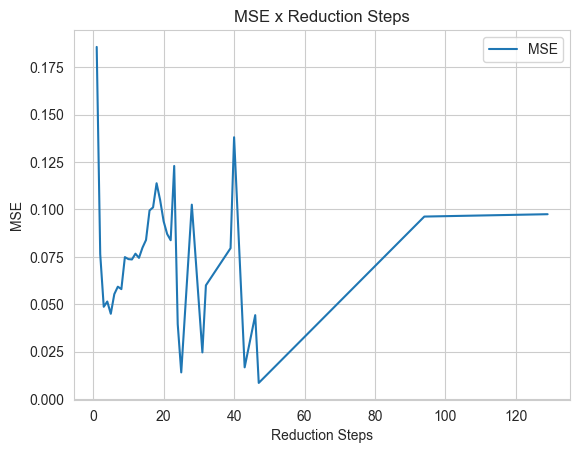

In [17]:
list_steps = list(mse_dict.keys())
list_mse = list(mse_dict.values())

for inx in range(1, len(list_steps)):
    for jnx in range(len(list_steps)):
        if list_steps[inx] < list_steps[jnx]:
            list_steps[inx], list_steps[jnx] = list_steps[jnx], list_steps[inx]
            list_mse[inx], list_mse[jnx] = list_mse[jnx], list_mse[inx]

plt.plot(list_steps, list_mse, label="MSE")

plt.xlabel("Reduction Steps")
plt.ylabel("MSE")
plt.title("MSE x Reduction Steps")
plt.legend()
plt.show()

In [18]:
def draw_pred_lines(y_pred, y_real):
    drawing_df = pd.DataFrame({"Pred": y_pred, "Real": y_real})
    drawing_df = drawing_df.sort_values("Real").reset_index(drop=True)

    for key_, val_ in drawing_df.items():
        plt.plot(range(len(val_)), val_, label=key_)

    plt.xlabel("No")
    plt.ylabel("Step Time")
    plt.title("Pred vs Real Step Time")
    plt.legend()
    plt.show()

1/1 [==============================] - 0s 22ms/step


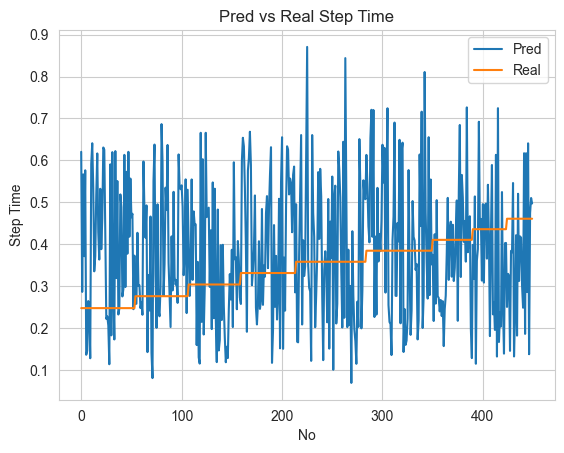

In [19]:
list_pred = []
list_real = []

for key_, value_ in dict_data.items():
    for v_ in value_[0]:
        list_real.append(v_[0][0])
    pred_value_ = model.predict(value_[0])
    for v_ in pred_value_:
        list_pred.append(v_)

draw_pred_lines(list_pred, list_real)

# Save the model

In [20]:
model_structure = model.to_json()
with open("./models/lstm_regression/structure.json", 'w') as json_file:
    json_file.write(model_structure)

model.save_weights("./models/lstm_regression/weights.h5")

# Some tests

In [ ]:
# Generate sample data
# Replace this with your own data
def generate_sample_data(num_timesteps=5, num_features=5):
    np.random.seed(0)
    num_samples = 1000
    X = np.random.rand(num_samples, num_timesteps, num_features)
    y = np.random.rand(num_samples, 1)
    return X, y


# Create the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, activation='relu'))
    model.add(Dense(1))
    return model


# Compile the model
def compile_model(model):
    model.compile(loss='mean_squared_error', optimizer='adam')


# Train the model
def train_model(model, X, y, epochs=10, batch_size=32):
    model.fit(X, y, epochs=epochs, batch_size=batch_size)

In [ ]:
# Example usage
X, y = generate_sample_data()
num_timesteps, num_features = X.shape[1], X.shape[2]
model = create_lstm_model(input_shape=(None, num_features))
compile_model(model)
train_model(model, X, y)

# Once the model is trained, you can use it for predictions
# Replace `new_data` with your new input data for prediction
new_data = np.random.rand(5, num_timesteps, num_features)
prediction = model.predict(new_data)
print("Predicted time spent on step:", prediction[0][0])

In [ ]:
X, y = generate_sample_data(num_timesteps=10)
train_model(model, X, y)

In [ ]:
X, y = generate_sample_data(num_timesteps=100)
train_model(model, X, y)

In [ ]:
model.summary()

In [ ]:
for row in X:
    print(row, "\n")

In [ ]:
print(y)